In [1]:
import pandas as pd

file_path = 'cancer.csv'
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.head())

print("\nDataset Structure:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
  Patient_ID Cancer_Type  Age  Gender  Smoking  Alcohol_Use  Obesity  \
0     LU0000      Breast   68       0        7            2        8   
1     LU0001    Prostate   74       1        8            9        8   
2     LU0002        Skin   55       1        7           10        7   
3     LU0003       Colon   61       0        6            2        2   
4     LU0004        Lung   67       1       10            7        4   

   Family_History  Diet_Red_Meat  Diet_Salted_Processed  ...  \
0               0              5                      3  ...   
1               0              0                      3  ...   
2               0              3                      3  ...   
3               0              6                      2  ...   
4               0              6                      3  ...   

   Physical_Activity  Air_Pollution  Occupational_Hazards  BRCA_Mutation  \
0                  4              6                     3              1   
1           

In [27]:

# 1. Cek jumlah missing values sebelum imputasi
print("Missing Values Before Imputation:")
print(df.isnull().sum())

# 2. Imputasi hanya untuk kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3. Imputasi untuk kolom kategorikal (menggunakan modus untuk kategori)
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 4. Cek jumlah missing values setelah imputasi
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values Before Imputation:
Patient_ID                 0
Cancer_Type                0
Age                        0
Gender                     0
Smoking                    0
Alcohol_Use                0
Obesity                    0
Family_History             0
Diet_Red_Meat              0
Diet_Salted_Processed      0
Fruit_Veg_Intake           0
Physical_Activity          0
Air_Pollution              0
Occupational_Hazards       0
BRCA_Mutation              0
H_Pylori_Infection         0
Calcium_Intake             0
Overall_Risk_Score         0
BMI                        0
Physical_Activity_Level    0
Risk_Level                 0
dtype: int64

Missing Values After Imputation:
Patient_ID                 0
Cancer_Type                0
Age                        0
Gender                     0
Smoking                    0
Alcohol_Use                0
Obesity                    0
Family_History             0
Diet_Red_Meat              0
Diet_Salted_Processed      0
Fruit_Veg_Intake    

In [10]:


# Memilih hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number])

# Menghitung IQR untuk masing-masing kolom numerik
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi dan menghapus outliers berdasarkan IQR
df_no_outliers = df[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

# Menampilkan dataset setelah penghapusan outliers
print("\nDataset After Removing Outliers:")
print(df_no_outliers.head())



Dataset After Removing Outliers:
  Patient_ID Cancer_Type  Age  Gender  Smoking  Alcohol_Use  Obesity  \
1     LU0001    Prostate   74       1        8            9        8   
2     LU0002        Skin   55       1        7           10        7   
3     LU0003       Colon   61       0        6            2        2   
4     LU0004        Lung   67       1       10            7        4   
5     LU0005        Lung   77       1       10            8        3   

   Family_History  Diet_Red_Meat  Diet_Salted_Processed  ...  \
1               0              0                      3  ...   
2               0              3                      3  ...   
3               0              6                      2  ...   
4               0              6                      3  ...   
5               0              6                      0  ...   

   Physical_Activity  Air_Pollution  Occupational_Hazards  BRCA_Mutation  \
1                  1              3                     3              0

In [11]:
from sklearn.preprocessing import StandardScaler

# Melakukan standardisasi pada kolom numerik
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Menggunakan Z-score untuk melakukan standardisasi
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Menampilkan dataset setelah standardisasi
print("\nDataset After Standardization (Z-score):")
print(df.head())



Dataset After Standardization (Z-score):
  Patient_ID Cancer_Type       Age    Gender   Smoking  Alcohol_Use   Obesity  \
0     LU0000      Breast  0.454288 -0.978237  0.554368    -0.930930  0.664079   
1     LU0001    Prostate  1.027883  1.022247  0.855164     1.216190  0.664079   
2     LU0002        Skin -0.788503  1.022247  0.554368     1.522922  0.337349   
3     LU0003       Colon -0.214907 -0.978237  0.253571    -0.930930 -1.296303   
4     LU0004        Lung  0.358689  1.022247  1.456757     0.602727 -0.642842   

   Family_History  Diet_Red_Meat  Diet_Salted_Processed  ...  \
0       -0.491391      -0.060089              -0.506388  ...   
1       -0.491391      -1.645547              -0.506388  ...   
2       -0.491391      -0.694272              -0.506388  ...   
3       -0.491391       0.257003              -0.830270  ...   
4       -0.491391       0.257003              -0.506388  ...   

   Physical_Activity  Air_Pollution  Occupational_Hazards  BRCA_Mutation  \
0         

In [12]:
# Melakukan One-Hot Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)

# Menampilkan dataset setelah One-Hot Encoding
print("\nDataset After One-Hot Encoding:")
print(df_encoded.head())



Dataset After One-Hot Encoding:
        Age    Gender   Smoking  Alcohol_Use   Obesity  Family_History  \
0  0.454288 -0.978237  0.554368    -0.930930  0.664079       -0.491391   
1  1.027883  1.022247  0.855164     1.216190  0.664079       -0.491391   
2 -0.788503  1.022247  0.554368     1.522922  0.337349       -0.491391   
3 -0.214907 -0.978237  0.253571    -0.930930 -1.296303       -0.491391   
4  0.358689  1.022247  1.456757     0.602727 -0.642842       -0.491391   

   Diet_Red_Meat  Diet_Salted_Processed  Fruit_Veg_Intake  Physical_Activity  \
0      -0.060089              -0.506388          0.680726          -0.005037   
1      -1.645547              -0.506388          0.680726          -1.012522   
2      -0.694272              -0.506388         -0.304643          -1.012522   
3       0.257003              -0.830270         -0.304643           0.666619   
4       0.257003              -0.506388          1.666096           1.674104   

   ...  Patient_ID_ST0396  Patient_ID_ST0

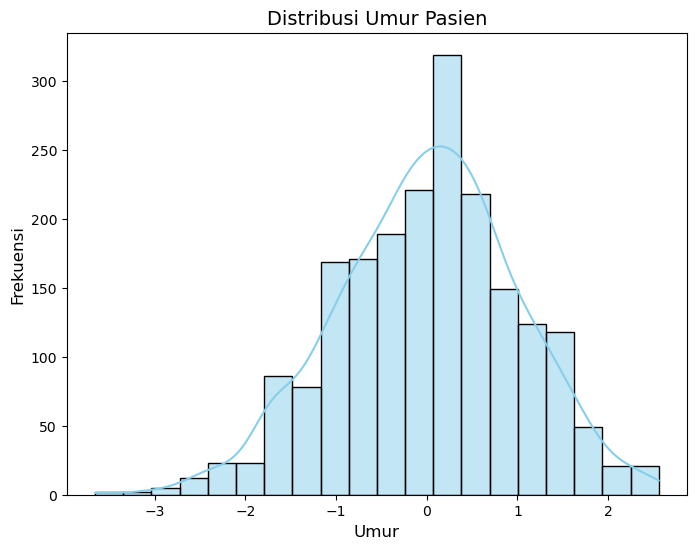

In [22]:
# 1. Visualisasi Distribusi Umur (Age) menggunakan Histogram
plt.figure(figsize=(8,6))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Umur Pasien', fontsize=14)
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

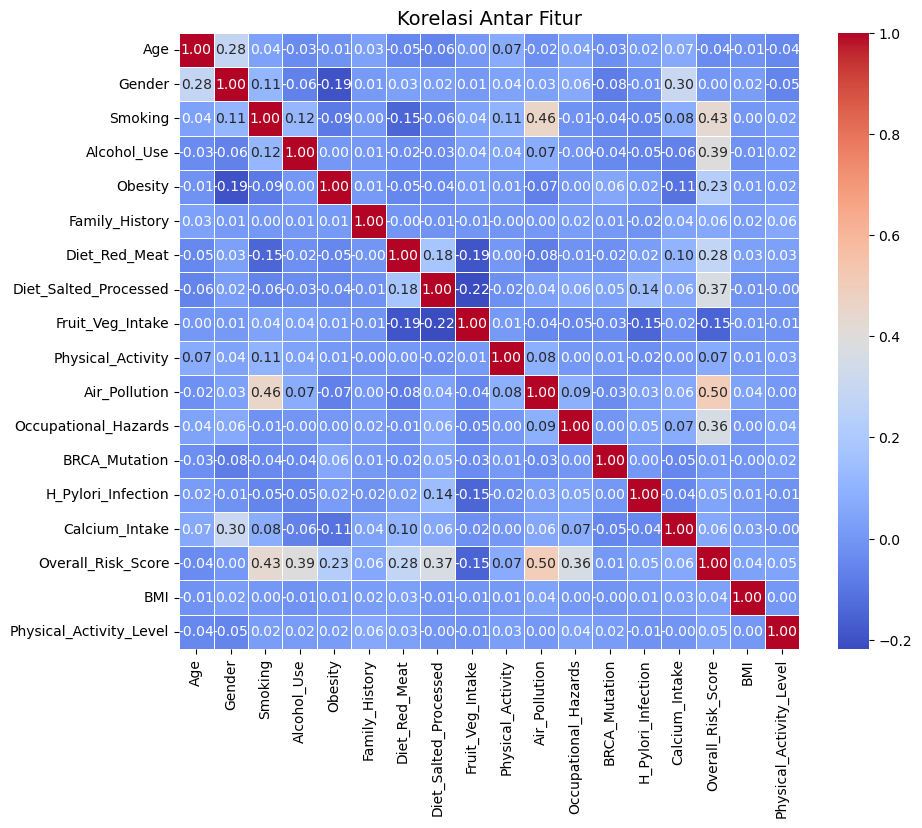

In [23]:
# 2. Visualisasi Korelasi Antara Fitur menggunakan Heatmap (hanya untuk kolom numerik)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
corr_matrix = numeric_df.corr()  # Menggunakan hanya kolom numerik
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur', fontsize=14)
plt.show()


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Breast'),
  Text(1, 0, 'Prostate'),
  Text(2, 0, 'Skin'),
  Text(3, 0, 'Colon'),
  Text(4, 0, 'Lung')])

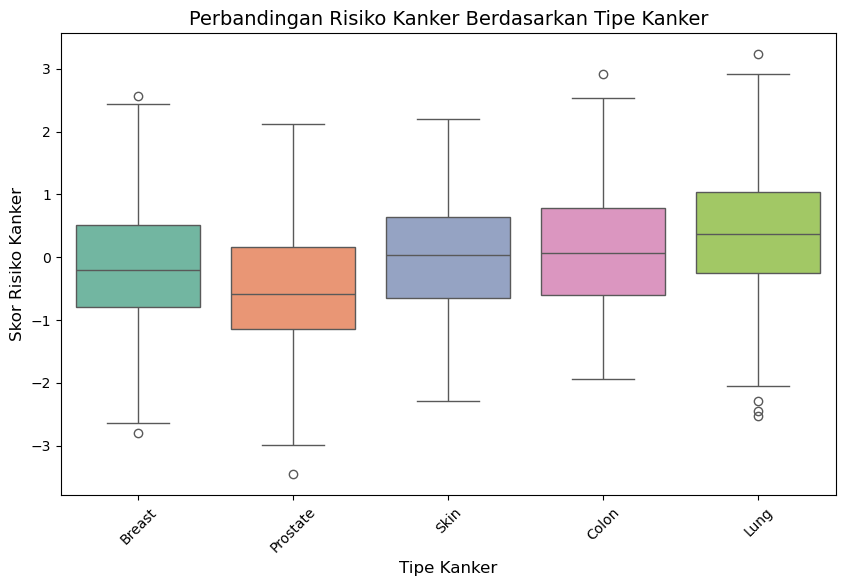

In [24]:
# 3. Visualisasi Perbandingan Risiko Kanker Berdasarkan Tipe Kanker menggunakan Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Cancer_Type', y='Overall_Risk_Score', data=df, hue='Cancer_Type', palette='Set2', dodge=False)
plt.title('Perbandingan Risiko Kanker Berdasarkan Tipe Kanker', fontsize=14)
plt.xlabel('Tipe Kanker', fontsize=12)
plt.ylabel('Skor Risiko Kanker', fontsize=12)
plt.xticks(rotation=45)

In [37]:
# 1. Uji Parametrik - Pearson Correlation antara BMI dan Overall_Risk_Score
bmi = df['BMI']
risk_score = df['Overall_Risk_Score']

# Pearson correlation
pearson_corr, p_value_pearson = stats.pearsonr(bmi, risk_score)

# Menghitung Confidence Interval untuk Pearson correlation (menggunakan Fisher transformation)
z = 0.5 * np.log((1 + pearson_corr) / (1 - pearson_corr))
se = 1 / np.sqrt(len(bmi) - 3)
z_critical = stats.norm.ppf(0.975)  # 95% Confidence Interval
z_lower = z - z_critical * se
z_upper = z + z_critical * se
r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

# Output untuk Pearson correlation
print("Uji Parametrik: Pearson Correlation")
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"p-value: {p_value_pearson:.3f}")
print(f"95% Confidence Interval: ({r_lower:.3f}, {r_upper:.3f})")
print("\n")

# 2. Uji Non-Parametrik - Kruskal-Wallis Test untuk membandingkan Risiko Kanker antara Tipe Kanker
cancer_types = df['Cancer_Type']
risk_scores_by_cancer_type = [df['Overall_Risk_Score'][cancer_types == cancer_type] for cancer_type in cancer_types.unique()]

# Kruskal-Wallis test
kruskal_stat, p_value_kruskal = stats.kruskal(*risk_scores_by_cancer_type)

# Output untuk Kruskal-Wallis test
print("Uji Non-Parametrik: Kruskal-Wallis Test")
print(f"Kruskal-Wallis H-statistic: {kruskal_stat:.3f}")
print(f"p-value: {p_value_kruskal:.3f}")


Uji Parametrik: Pearson Correlation
Pearson Correlation: 0.037
p-value: 0.097
95% Confidence Interval: (-0.007, 0.081)


Uji Non-Parametrik: Kruskal-Wallis Test
Kruskal-Wallis H-statistic: 167.212
p-value: 0.000
